In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings("ignore")

### Загрузка данных

In [2]:
trainX = pd.read_csv("train.csv")
testX = pd.read_csv("test.csv")

In [3]:
trainX.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
1,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
2,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
3,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
4,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S


In [4]:
testX.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,384,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
1,882,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
2,276,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
3,648,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
4,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S


### Проврека нулевых значений

In [5]:
trainX.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            102
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          414
Embarked         0
dtype: int64

In [6]:
testX.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             75
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          273
Embarked         2
dtype: int64

### Создание контрольного столбца trainY для trainX исходя из Survived

In [7]:
target_column = 'Survived'
trainY = trainX[target_column]
trainX = trainX.drop(target_column, axis=1)

In [8]:
trainY

0      0
1      0
2      1
3      1
4      1
      ..
529    0
530    0
531    0
532    1
533    1
Name: Survived, Length: 534, dtype: int64

### Заполнение нулевых значений

In [9]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  534 non-null    int64  
 1   Pclass       534 non-null    int64  
 2   Name         534 non-null    object 
 3   Sex          534 non-null    object 
 4   Age          432 non-null    float64
 5   SibSp        534 non-null    int64  
 6   Parch        534 non-null    int64  
 7   Ticket       534 non-null    object 
 8   Fare         534 non-null    float64
 9   Cabin        120 non-null    object 
 10  Embarked     534 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 46.0+ KB


In [10]:
len(trainX['Cabin'][pd.isnull(trainX['Cabin'])])

414

414 значений нулевых в столбце 'Cabin' типа object

In [11]:
len(trainX['Age'][pd.isnull(trainX['Age'])])

102

In [12]:
trainX['Age'].unique()

array([  nan, 43.  , 24.  ,  1.  ,  0.75, 26.  , 29.  , 20.  , 19.  ,
       17.  , 27.  ,  5.  , 63.  ,  9.  ,  3.  , 38.  , 61.  , 31.  ,
       45.  , 22.  , 30.  , 33.  , 36.  , 25.  ,  6.  , 44.  , 18.  ,
       54.  , 35.  ,  0.67,  2.  , 42.  , 62.  , 47.  , 16.  , 46.  ,
       28.  , 23.  , 39.  , 51.  , 52.  , 11.  ,  0.83, 14.5 , 40.5 ,
       60.  , 71.  , 13.  , 40.  , 12.  , 50.  , 45.5 , 49.  , 37.  ,
       21.  , 34.  , 58.  , 70.  , 32.  ,  0.92, 57.  , 59.  ,  4.  ,
       14.  , 32.5 , 23.5 , 55.5 , 10.  , 48.  , 41.  ,  8.  , 65.  ,
       80.  , 70.5 , 30.5 , 36.5 , 20.5 , 55.  , 64.  ,  0.42, 56.  ])

102 нулевых значения в столбце 'Age' типа float

Cabin - замена пропусков методом k-ближайших соседей

In [13]:
trainX['Cabin'].unique()

array([nan, 'B3', 'F4', 'C148', 'B20', 'B42', 'B19', 'E8', 'B38', 'C90',
       'B4', 'E46', 'C110', 'D47', 'D28', 'C65', 'E31', 'D20', 'B35',
       'B41', 'E121', 'A5', 'B94', 'E33', 'B18', 'T', 'D26',
       'B51 B53 B55', 'C68', 'B96 B98', 'E67', 'D35', 'D36', 'C125',
       'B79', 'C23 C25 C27', 'B22', 'A24', 'D9', 'C124', 'C32', 'C22 C26',
       'D30', 'E63', 'C7', 'D', 'D17', 'C45', 'D50', 'C92', 'E68', 'C87',
       'C78', 'B57 B59 B63 B66', 'B49', 'B82 B84', 'C85', 'D10 D12',
       'C82', 'E77', 'F33', 'A20', 'C126', 'B37', 'E40', 'C62 C64', 'A19',
       'A6', 'B50', 'A23', 'D56', 'B78', 'E10', 'C83', 'B58 B60', 'C111',
       'C2', 'F G73', 'E101', 'E44', 'E25', 'A16', 'C70', 'F2', 'E50',
       'C123', 'C52', 'B101', 'D37', 'B69', 'D33', 'E36', 'D48', 'A31',
       'B73', 'D11', 'B77', 'C50', 'F G63', 'C93', 'C118', 'B5', 'E12'],
      dtype=object)

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

In [15]:
trainX['Cabin'] = trainX['Cabin'].replace({np.nan: None})
trainX['Cabin'] = trainX['Cabin'].replace({None: ''})
trainX['Cabin'].value_counts()

               414
B96 B98          3
C23 C25 C27      3
D35              2
E67              2
              ... 
B58 B60          1
C32              1
D                1
E46              1
C123             1
Name: Cabin, Length: 103, dtype: int64

Кодировка

In [16]:
enc = OneHotEncoder()
cabin_fit = pd.DataFrame(enc.fit_transform(trainX[['Cabin']]).toarray())
cabin_fit

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
len(cabin_fit[cabin_fit[0] == 1])

414

414. Значение нулей осталось таким же. Так что вроде бы ошибки нет

In [18]:
cabin_fit.loc[cabin_fit[0] == 1, [0]] = 0

In [19]:
knn_imputer = KNNImputer()
inputed_df = knn_imputer.fit_transform(cabin_fit.iloc[:,1:])

Метод завершил свою работу. Стоит посмотреть на результат

In [20]:
cabin_fit.iloc[:,1:] = inputed_df
cabin_fit

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
for i in range(0,len(cabin_fit)):
    print(cabin_fit.iloc[i,:].max() == 0)

True
True
False
True
False
True
True
True
False
True
True
True
False
True
True
True
True
True
True
True
False
True
True
True
True
False
True
True
True
True
True
False
False
True
True
True
False
True
True
True
True
True
True
True
False
True
True
False
False
True
True
True
True
True
True
True
False
True
False
True
False
True
True
False
True
False
True
True
True
True
True
True
False
True
True
True
True
True
False
True
True
True
True
True
True
True
True
False
False
False
True
True
True
False
True
True
True
True
True
True
False
False
False
False
True
True
True
True
False
True
True
True
True
True
True
True
True
False
True
False
True
False
True
True
False
True
True
True
False
False
False
True
False
True
True
True
True
True
True
True
False
True
True
True
False
True
True
False
True
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
False
True


Метод K-ближайших соседей не помог в заполнении пропусков для столбца Cabin. Остались все равно строки, где все значения нули. 

Тем не менее, декодируем обратно и посмотрим, какое кол-во нулевых значений стало теперь

In [22]:
for i in range(0,len(cabin_fit)):
    if(cabin_fit.iloc[i,:].max() == 0):
        cabin_fit.iloc[i,0] = 1

In [23]:
temp = pd.DataFrame(enc.inverse_transform(cabin_fit))
temp.value_counts()

               414
C23 C25 C27      3
B96 B98          3
E44              2
C68              2
              ... 
B82 B84          1
B79              1
B78              1
B77              1
T                1
Length: 103, dtype: int64

Ничего не изменилось. Метод k-ближайших соседей оказался неподходящим для данного столбца

Не будем расстраиваться, перейдем к столбцу Age. Здесь было решено для нулевых значений создать атрибут "Нуль терминант", который будет нам говорить об отсутсвии возраста у человека значением 1

In [24]:
trainX['Age'].value_counts()

19.00    21
30.00    19
22.00    18
18.00    17
28.00    17
         ..
0.92      1
23.50     1
70.50     1
36.50     1
71.00     1
Name: Age, Length: 80, dtype: int64

In [25]:
trainX['Null_terminal Age'] = 0
testX['Null_terminal Age'] = 0
trainX


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Null_terminal Age
0,486,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,,S,0
1,426,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,,S,0
2,780,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,0
3,248,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,,S,0
4,184,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
529,643,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,,S,0
530,375,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,,S,0
531,177,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,,S,0
532,438,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,,S,0


Заполнение столбца 'Null_terminal Age'

In [26]:
trainX.loc[trainX['Age'].isnull(), ['Null_terminal Age']] = 1
testX.loc[testX['Age'].isnull(), ['Null_terminal Age']] = 1
trainX.loc[trainX['Age'].isnull(), ['Age']] = 0
testX.loc[testX['Age'].isnull(), ['Age']] = 0
trainX

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Null_terminal Age
0,486,3,"Lefebre, Miss. Jeannie",female,0.0,3,1,4133,25.4667,,S,1
1,426,3,"Wiseman, Mr. Phillippe",male,0.0,0,0,A/4. 34244,7.2500,,S,1
2,780,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,0
3,248,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,,S,0
4,184,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
529,643,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,,S,0
530,375,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,,S,0
531,177,3,"Lefebre, Master. Henry Forbes",male,0.0,3,1,4133,25.4667,,S,1
532,438,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,,S,0


Столбец 'Cabin' было решено убрать. Так как восстановить пропущенные значения у автора данного текста не является возможным

In [27]:
trainX = trainX.drop(['Cabin'], axis=1)
testX = testX.drop(['Cabin'], axis=1)

#### В тестовых данных были ещё пару пропусков, поэтому заменим пропущенные значения в Embarked testX популярными значениями

In [28]:
print(f"Кол-во нулевых значений в Embarked testX = {testX['Embarked'].isnull().sum()}")
testX['Embarked'] =  np.where(testX['Embarked'].isnull(), testX['Embarked'].mode(), testX['Embarked'])
print(f"Кол-во нулевых значений в Embarked testX = {testX['Embarked'].isnull().sum()}")

Кол-во нулевых значений в Embarked testX = 2
Кол-во нулевых значений в Embarked testX = 0


Слегка познакомимся с данными

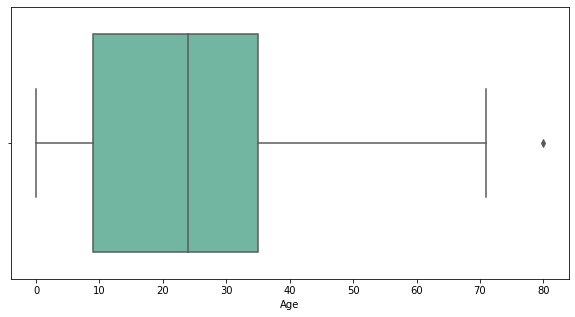

In [29]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=trainX['Age'], palette="Set2")
plt.show()

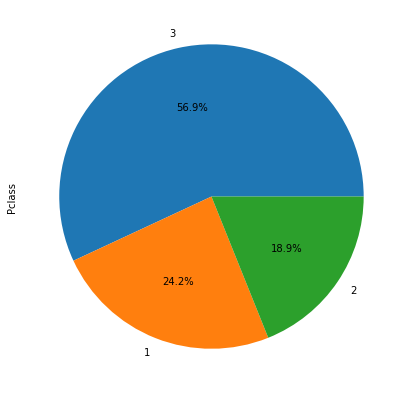

In [30]:
plt.figure(figsize=(10,7))
temp = trainX['Pclass'].value_counts()
temp.plot.pie(autopct="%.1f%%")
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

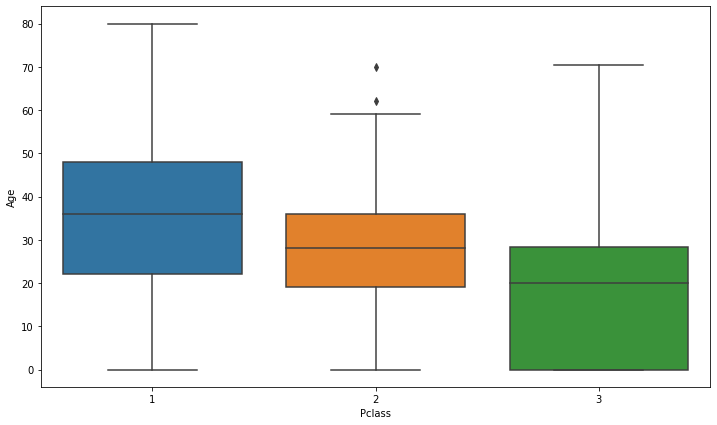

In [31]:
plt.figure(figsize=(12,7))
sns.boxplot(x=trainX["Pclass"],y=trainX["Age"])

Так как методы sklearn не работают с категориальными переменными, кодируем их с помощью LabelEncoder

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
trainX['Embarked'] = le.fit_transform(trainX['Embarked'])
testX['Embarked'] = le.fit_transform(testX['Embarked'])

trainX['Sex'] = le.fit_transform(trainX['Sex'])
testX['Sex'] = le.fit_transform(testX['Sex'])

Удалим столбец Name, так как не верится, что имя могло повлиять на результат, выжил человек на Титанике или нет

In [34]:
trainX = trainX.drop(['Name'], axis=1)
testX = testX.drop(['Name'], axis=1)

trainX = trainX.drop(['Ticket'], axis=1)
testX = testX.drop(['Ticket'], axis=1)

Сразу сохраним столбец PassengerId

In [35]:
test_id = testX['PassengerId']

Теперь он нам не нужен

In [36]:
trainX = trainX.drop(['PassengerId'], axis=1)
testX = testX.drop(['PassengerId'], axis=1)

Нормализуем данные

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

trainX_norm = pd.DataFrame(sc.fit_transform(trainX))
trainX_norm.columns = trainX.columns
trainX = trainX_norm

testX_norm = pd.DataFrame(sc.fit_transform(testX))
testX_norm.columns = testX.columns
testX = testX_norm
trainX

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Null_terminal Age
0,0.801553,-1.356623,-1.358695,2.033165,0.757215,-0.140233,0.603757,2.057983
1,0.801553,0.737125,-1.358695,-0.455094,-0.464395,-0.489517,0.603757,2.057983
2,-1.583011,-1.356623,1.080073,-0.455094,0.757215,3.423627,0.603757,-0.485913
3,-0.390729,-1.356623,0.002478,-0.455094,1.978825,-0.350507,0.603757,-0.485913
4,-0.390729,0.737125,-1.301980,1.203746,0.757215,0.119253,0.603757,-0.485913
...,...,...,...,...,...,...,...,...
529,0.801553,-1.356623,-1.245264,2.033165,1.978825,-0.093577,0.603757,-0.485913
530,0.801553,-1.356623,-1.188549,2.033165,0.757215,-0.224439,0.603757,-0.485913
531,0.801553,0.737125,-1.358695,2.033165,0.757215,-0.140233,0.603757,2.057983
532,-0.390729,-1.356623,0.002478,1.203746,3.200435,-0.269018,0.603757,-0.485913


Процесс обработки данных закончен

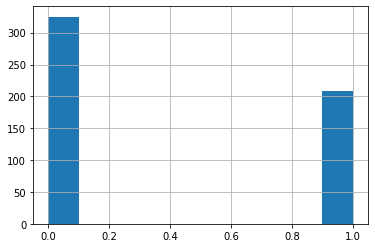

In [38]:
trainY.hist()
plt.show()

Можем заметить, что Y несбалансирован

Поэтому предсказательную способность модели будем оценивать по метрике ROC-AUC.

Так же воспользуемся воспользуем разделением данных на тренировочную и валидационную выборку

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, train_size=0.7)

### ROC AUC function

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve

In [42]:
def roc_auc_plot(y_train, y_train_predicted, y_val, y_val_predicted):
    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_val, y_val_predicted)

    plt.figure(figsize=(10,7))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

In [43]:
def create_submission(id_col, y_pred):
    submission = pd.DataFrame({
        'PassengerId': id_col,
        'Survived': y_pred
    })
    return submission

### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [45]:
def selection_KNN(trainX, trainY, valX, valY):
    algorithm_list =['auto', 'ball_tree', 'kd_tree', 'brute']
    weights_list = ['uniform', 'distance']
    n_neighbors = [2, 4, 6, 8, 10, 12]
    best_val=0
    for algorithm in algorithm_list:
        for weight in weights_list:
            for n_neighbor in n_neighbors:
                knn = KNeighborsClassifier(weights=weight, algorithm=algorithm, n_neighbors=n_neighbor).fit(trainX, trainY)
                y_train_predicted = knn.predict_proba(trainX)[:, 1]
                y_val_predicted = knn.predict_proba(valX)[:, 1]
                train_roc = roc_auc_score(trainY, y_train_predicted)
                val_roc = roc_auc_score(valY, y_val_predicted)
                if val_roc > best_val:
                    best_val=val_roc
                    print(algorithm, weight, n_neighbor)

In [46]:
selection_KNN(trainX, trainY, valX, valY)

auto uniform 2
auto uniform 4
auto uniform 6
auto uniform 8
auto uniform 10
brute uniform 10
brute uniform 12


Таким образом мы подобрали наилучший результат

In [47]:
knn = KNeighborsClassifier(weights='uniform', algorithm='brute', n_neighbors=4).fit(trainX, trainY)

Посмотрим на получившийся результат и построим график для ROC-AUC

In [48]:
y_train_predicted_knn = knn.predict_proba(trainX)[:, 1]
y_val_predicted_knn = knn.predict_proba(valX)[:, 1]

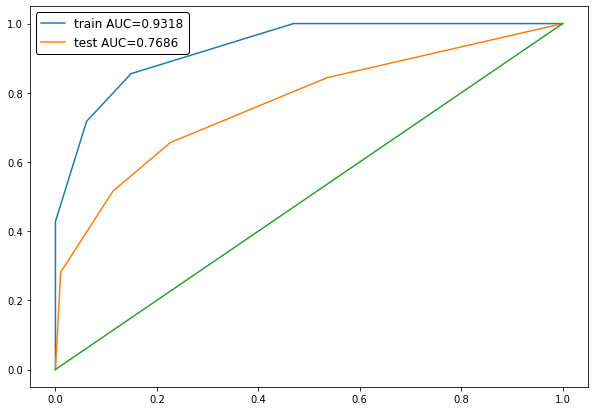

In [49]:
roc_auc_plot(trainY, y_train_predicted_knn, valY, y_val_predicted_knn)

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
def selection_LR(trainX, trainY, valX, valY):
    penalty_list =['l2', 'none']
    tol_list = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
    C_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
    class_weight= ['balanced', None]
    best_val = 0
    for penalty in penalty_list:
        for tol in tol_list:
            for C in C_list:
                for class_w in class_weight:
                    LR = LogisticRegression(penalty=penalty, tol=tol, C=C, class_weight=class_w).fit(trainX, trainY)
                    y_train_predicted = knn.predict_proba(trainX)[:, 1]
                    y_val_predicted = knn.predict_proba(valX)[:, 1]
                    train_roc = roc_auc_score(trainY, y_train_predicted)
                    val_roc = roc_auc_score(valY, y_val_predicted)
                    if val_roc > best_val:
                        best_val=val_roc
                        print(penalty, tol, C, class_w)

In [52]:
selection_LR(trainX, trainY, valX, valY)

l2 0.01 0.2 balanced


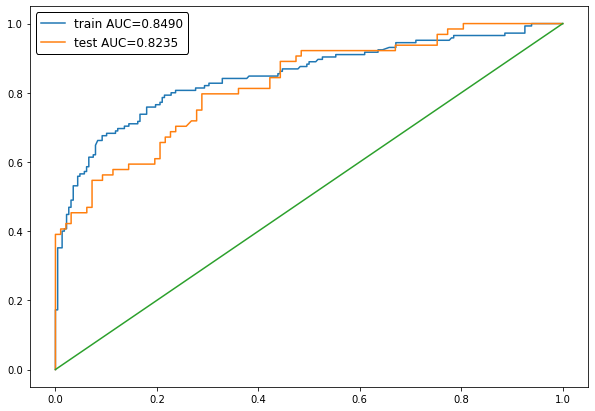

In [53]:
LR_model = LogisticRegression(C=0.2, tol=1e-2, penalty='l2', class_weight='balanced')
# The “balanced” mode uses the values of y to automatically adjust weights 
# inversely proportional to class frequencies in the input data as .n_samples / (n_classes * np.bincount(y))

LR_model.fit(trainX, trainY)

y_train_predicted_knn = LR_model.predict_proba(trainX)[:, 1]
y_val_predicted_knn = LR_model.predict_proba(valX)[:, 1]

roc_auc_plot(trainY, y_train_predicted_knn, valY, y_val_predicted_knn)

### Naive-Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
import random

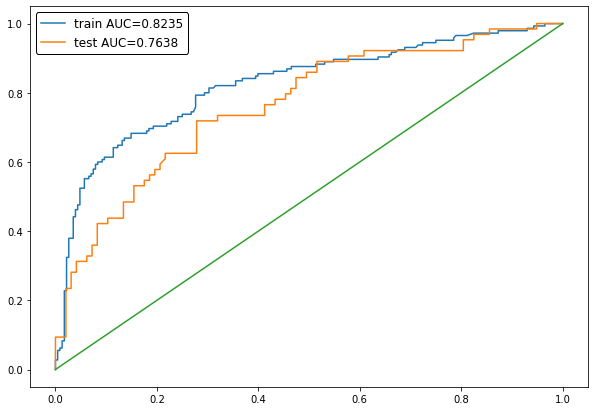

In [55]:
NB_model = GaussianNB().fit(trainX, trainY)

y_train_predicted_knn = NB_model.predict_proba(trainX)[:, 1]
y_val_predicted_knn = NB_model.predict_proba(valX)[:, 1]

roc_auc_plot(trainY, y_train_predicted_knn, valY, y_val_predicted_knn)

### Linear Discriminant Analysis

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

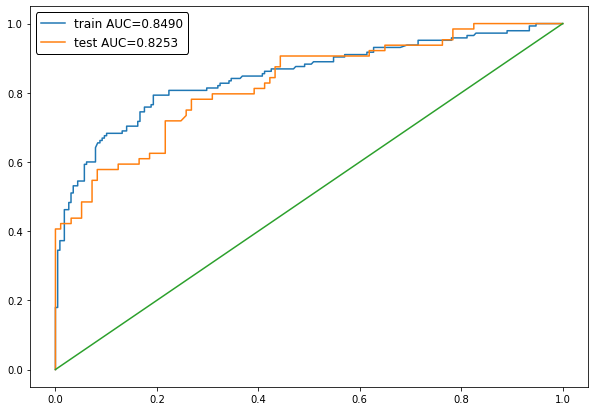

In [57]:
LDA_model = LinearDiscriminantAnalysis(solver='lsqr').fit(trainX, trainY)

y_train_predicted_knn = LDA_model.predict_proba(trainX)[:, 1]
y_val_predicted_knn = LDA_model.predict_proba(valX)[:, 1]

roc_auc_plot(trainY, y_train_predicted_knn, valY, y_val_predicted_knn)

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

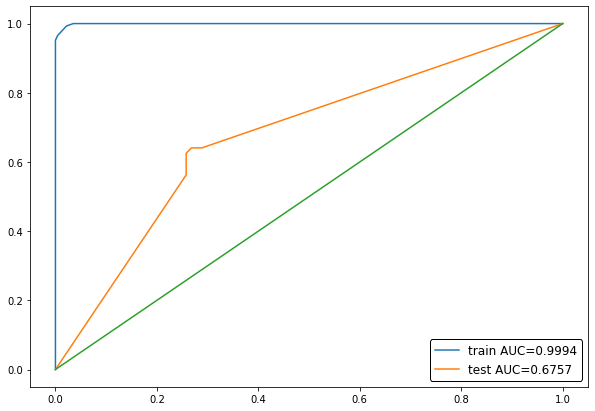

In [59]:
DCT_model = DecisionTreeClassifier(criterion='gini').fit(trainX, trainY)

y_train_predicted_knn = DCT_model.predict_proba(trainX)[:, 1]
y_val_predicted_knn = DCT_model.predict_proba(valX)[:, 1]

roc_auc_plot(trainY, y_train_predicted_knn, valY, y_val_predicted_knn)

### Применение нейронных сетей

In [60]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras import regularizers

model_neural = Sequential()

model_neural.add(Dense(100, activation='relu', input_shape=(8,), kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model_neural.add(Dense(100, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model_neural.add(Dense(1, activation='sigmoid'))

model_neural.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.00001),
              metrics=['accuracy'])
                   
model_neural.fit(trainX, trainY, epochs=150, batch_size=1, verbose=1, validation_data=(valX, valY))

Epoch 1/150
373/373 [==============================] - 2s 4ms/step - loss: 0.7310 - accuracy: 0.3590 - val_loss: 0.7086 - val_accuracy: 0.5963
Epoch 2/150
373/373 [==============================] - 1s 2ms/step - loss: 0.7104 - accuracy: 0.5959 - val_loss: 0.6937 - val_accuracy: 0.7329
Epoch 3/150
373/373 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.6966 - val_loss: 0.6803 - val_accuracy: 0.7329
Epoch 4/150
373/373 [==============================] - 1s 2ms/step - loss: 0.6722 - accuracy: 0.6910 - val_loss: 0.6683 - val_accuracy: 0.7205
Epoch 5/150
373/373 [==============================] - 1s 2ms/step - loss: 0.6648 - accuracy: 0.7476 - val_loss: 0.6575 - val_accuracy: 0.7391
Epoch 6/150
373/373 [==============================] - 1s 2ms/step - loss: 0.6441 - accuracy: 0.7431 - val_loss: 0.6477 - val_accuracy: 0.7391
Epoch 7/150
373/373 [==============================] - 1s 2ms/step - loss: 0.6377 - accuracy: 0.7610 - val_loss: 0.6388 - val_accuracy: 0.7516

Epoch 58/150
373/373 [==============================] - 1s 2ms/step - loss: 0.4675 - accuracy: 0.8205 - val_loss: 0.5087 - val_accuracy: 0.7516
Epoch 59/150
373/373 [==============================] - 1s 2ms/step - loss: 0.4302 - accuracy: 0.8244 - val_loss: 0.5085 - val_accuracy: 0.7516
Epoch 60/150
373/373 [==============================] - 1s 3ms/step - loss: 0.4535 - accuracy: 0.7996 - val_loss: 0.5081 - val_accuracy: 0.7516
Epoch 61/150
373/373 [==============================] - 1s 3ms/step - loss: 0.4556 - accuracy: 0.8133 - val_loss: 0.5075 - val_accuracy: 0.7453
Epoch 62/150
373/373 [==============================] - 1s 2ms/step - loss: 0.4591 - accuracy: 0.8070 - val_loss: 0.5073 - val_accuracy: 0.7516
Epoch 63/150
373/373 [==============================] - 1s 2ms/step - loss: 0.4732 - accuracy: 0.7889 - val_loss: 0.5066 - val_accuracy: 0.7453
Epoch 64/150
373/373 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.8019 - val_loss: 0.5064 - val_accuracy:

Epoch 115/150
373/373 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8425 - val_loss: 0.4975 - val_accuracy: 0.7640
Epoch 116/150
373/373 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7795 - val_loss: 0.4975 - val_accuracy: 0.7640
Epoch 117/150
373/373 [==============================] - 1s 2ms/step - loss: 0.4347 - accuracy: 0.8191 - val_loss: 0.4974 - val_accuracy: 0.7640
Epoch 118/150
373/373 [==============================] - 1s 2ms/step - loss: 0.4569 - accuracy: 0.8166 - val_loss: 0.4973 - val_accuracy: 0.7578
Epoch 119/150
373/373 [==============================] - 1s 2ms/step - loss: 0.3819 - accuracy: 0.8515 - val_loss: 0.4974 - val_accuracy: 0.7640
Epoch 120/150
373/373 [==============================] - 1s 2ms/step - loss: 0.4137 - accuracy: 0.8316 - val_loss: 0.4971 - val_accuracy: 0.7578
Epoch 121/150
373/373 [==============================] - 1s 2ms/step - loss: 0.4015 - accuracy: 0.8422 - val_loss: 0.4972 - val_ac

In [61]:
y_test_predicted_knn = knn.predict_proba(testX)[:, 1]
sub = create_submission(test_id, y_test_predicted_knn)
sub

,PassengerId,Survived
0,384,1.00
1,882,0.00
2,276,1.00
3,648,0.25
4,224,0.25
...,...,...
352,115,0.50
353,539,0.00
354,656,0.00
355,11,0.75


In [62]:
# sub.to_csv("sub.csv", index=False)

### После всего мы можем видеть, что лучшая точность на валидационной выборке была достигнута методом логистической регрессии

По этому случаю, сделаем финальное предсказание, используя эту модель

In [63]:
# y_test_predicted_knn = LR_model.predict_proba(testX)[:, 1]
# sub = create_submission(test_id, y_test_predicted_knn)
# sub

In [64]:
# sub.to_csv("sub.csv", index=False)

In [65]:
# y_test_predicted_knn = LDA_model.predict_proba(testX)[:, 1]
# sub = create_submission(test_id, y_test_predicted_knn)
# sub

In [66]:
# sub.to_csv("subv2.csv", index=False)